# Yolo V3'Ün  COLAB Üzerinde uygulanması
* İlk olarak Google Drive'a erişmek için aşağıdaki komutu çalıştıralım

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ls gdrive/My\ Drive

'2019 faz 2'				 elazig_buyuk_veri
'ahmet ve ben'				 FaceCaffe.ipynb
 ahtel					'furkan proje'
'android proje'				 GOT.jpg
 app					"Jason's Machine Learning 101.gslides"
'CIFAR 10 ile resim siniflandirma'	'linkedin projeler'
'CIFAR 10 ile resim siniflandirma.rar'	'linkedin videos.rar'
 Colab_Kullanım				 Multi_Label_dataset.zip
'Colab Notebooks'			 oyunlar
'colab projeler'			 Projeler
 darknet				'Rec 0022.mp4'
'Data Lit'				 SCVGAN
 download_facescrub.rar			 Untitled0.ipynb


In [3]:
!mkdir gdrive/My\ Drive/darknet

mkdir: cannot create directory ‘gdrive/My Drive/darknet’: File exists


In [4]:
!ls -la "/content/gdrive/My Drive/darknet"

total 0


In [5]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [6]:
!tree /content/gdrive/My\ Drive/darknet/

/content/gdrive/My Drive/darknet/

0 directories, 0 files


In [8]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [9]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

tar (child): gdrive/My Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
cat: /usr/local/cuda/include/cudnn.h: No such file or directory


In [10]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/kriyeng/darknet/
%cd darknet

# Check the folder
!ls

# I have a branch where I have done the changes commented above
!git checkout feature/google-colab

#Compile Darknet
!make

#Copies the Darknet compiled version to Google drive
!cp ./darknet /content/gdrive/My\ Drive/darknet/bin/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.
/content/darknet
3rdparty      CMakeLists.txt	      image_yolov3.sh	     README.md
appveyor.yml  CMakeSettings.json      include		     results
backup	      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cfg	      data		      obj		     yolov3.weights
cmake	      image_yolov2.sh	      predictions.jpg	     yolov3.weights.1
Already on 'feature/google-colab'
Your branch is up to date with 'origin/feature/google-colab'.
chmod +x *.sh
cp: cannot create regular file '/content/gdrive/My Drive/darknet/bin/darknet': No such file or directory


In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [13]:
# Not necessary cell
# Get yolov3 weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-07-09 13:53:27--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

yolov3.weights.2    100%[===================>] 236.52M  22.4MB/s    in 11s     

2019-07-09 13:53:39 (21.1 MB/s) - ‘yolov3.weights.2’ saved [248007048/248007048]



layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

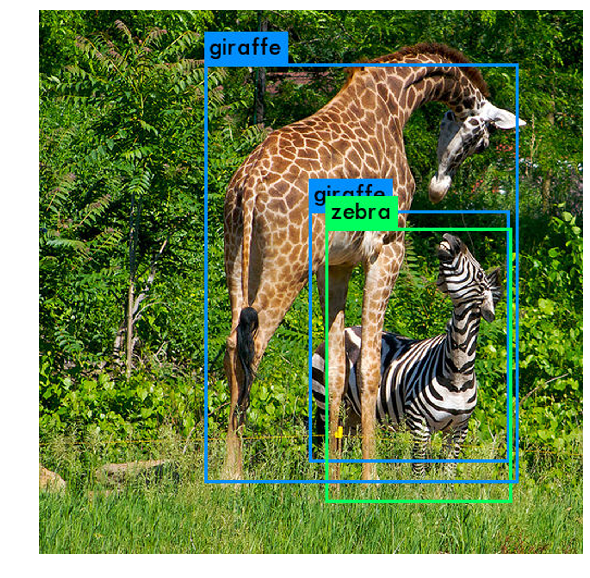

In [25]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

In [17]:
!pwd

/content/darknet


In [19]:
!ls

3rdparty	CMakeSettings.json	json_mjpeg_streams.sh  src
appveyor.yml	darknet			LICENSE		       video_v2.sh
backup		DarknetConfig.cmake.in	Makefile	       video_yolov3.sh
build		darknet.py		net_cam_v3.sh	       yolov3.weights
build.ps1	darknet_video.py	obj		       yolov3.weights.1
build.sh	data			predictions.jpg        yolov3.weights.2
cfg		image_yolov2.sh		README.md
cmake		image_yolov3.sh		results
CMakeLists.txt	include			scripts


In [0]:
!cd ../

In [21]:
!pwd

/content/darknet


In [0]:
!mv /content/biz.jpg /content/darknet/data/